# Práctica 4 de IA

## 1. Construcción de clasificadores en bases de datos sintéticas (2 puntos)

In [1]:
# Esta primera parte está adaptada de:
# http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

%matplotlib inline

In [3]:
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

def plot_classifiers(classifiers, datasets):
    
    figure = plt.figure(figsize=(4*6, 4*4))
    h = .02  # step size in the mesh
    i = 1
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=.4,
                                                            random_state=42)
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        
        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        if ds_cnt == 0:
            ax.set_title("Input data", fontsize=24)
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                   edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1
        
        # iterate over classifiers
        for name, clf in classifiers:
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            
            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            
            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
            
            # Plot also the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                       edgecolors='k')
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       edgecolors='k', alpha=0.6)
            
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name, fontsize=24)
            ax.text(xx.max() - .3, yy.min() + .3, ('Score test: %.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')
            i += 1
    
    plt.tight_layout()
    plt.show()

In [4]:
# data preparation
simple = make_blobs(n_samples=500, n_features=2,
                    centers=[[0,0], [2.5,2.5]],
                    random_state=1)
X,y = make_blobs(n_samples=500, n_features=2,
                 centers=[[0,0], [5,1]],
                 random_state=1)
X = X*np.matrix([[1,-2],[-20,10]])
linearly_separable=(X,y)

datasets = [simple,
            linearly_separable,
            make_moons(noise=0.1, random_state=0, n_samples=500),
            make_circles(noise=0.1, factor=0.5, random_state=1,
                         n_samples=500)
           ]

In [20]:
print(len(datasets[0][0]))

500


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimiz

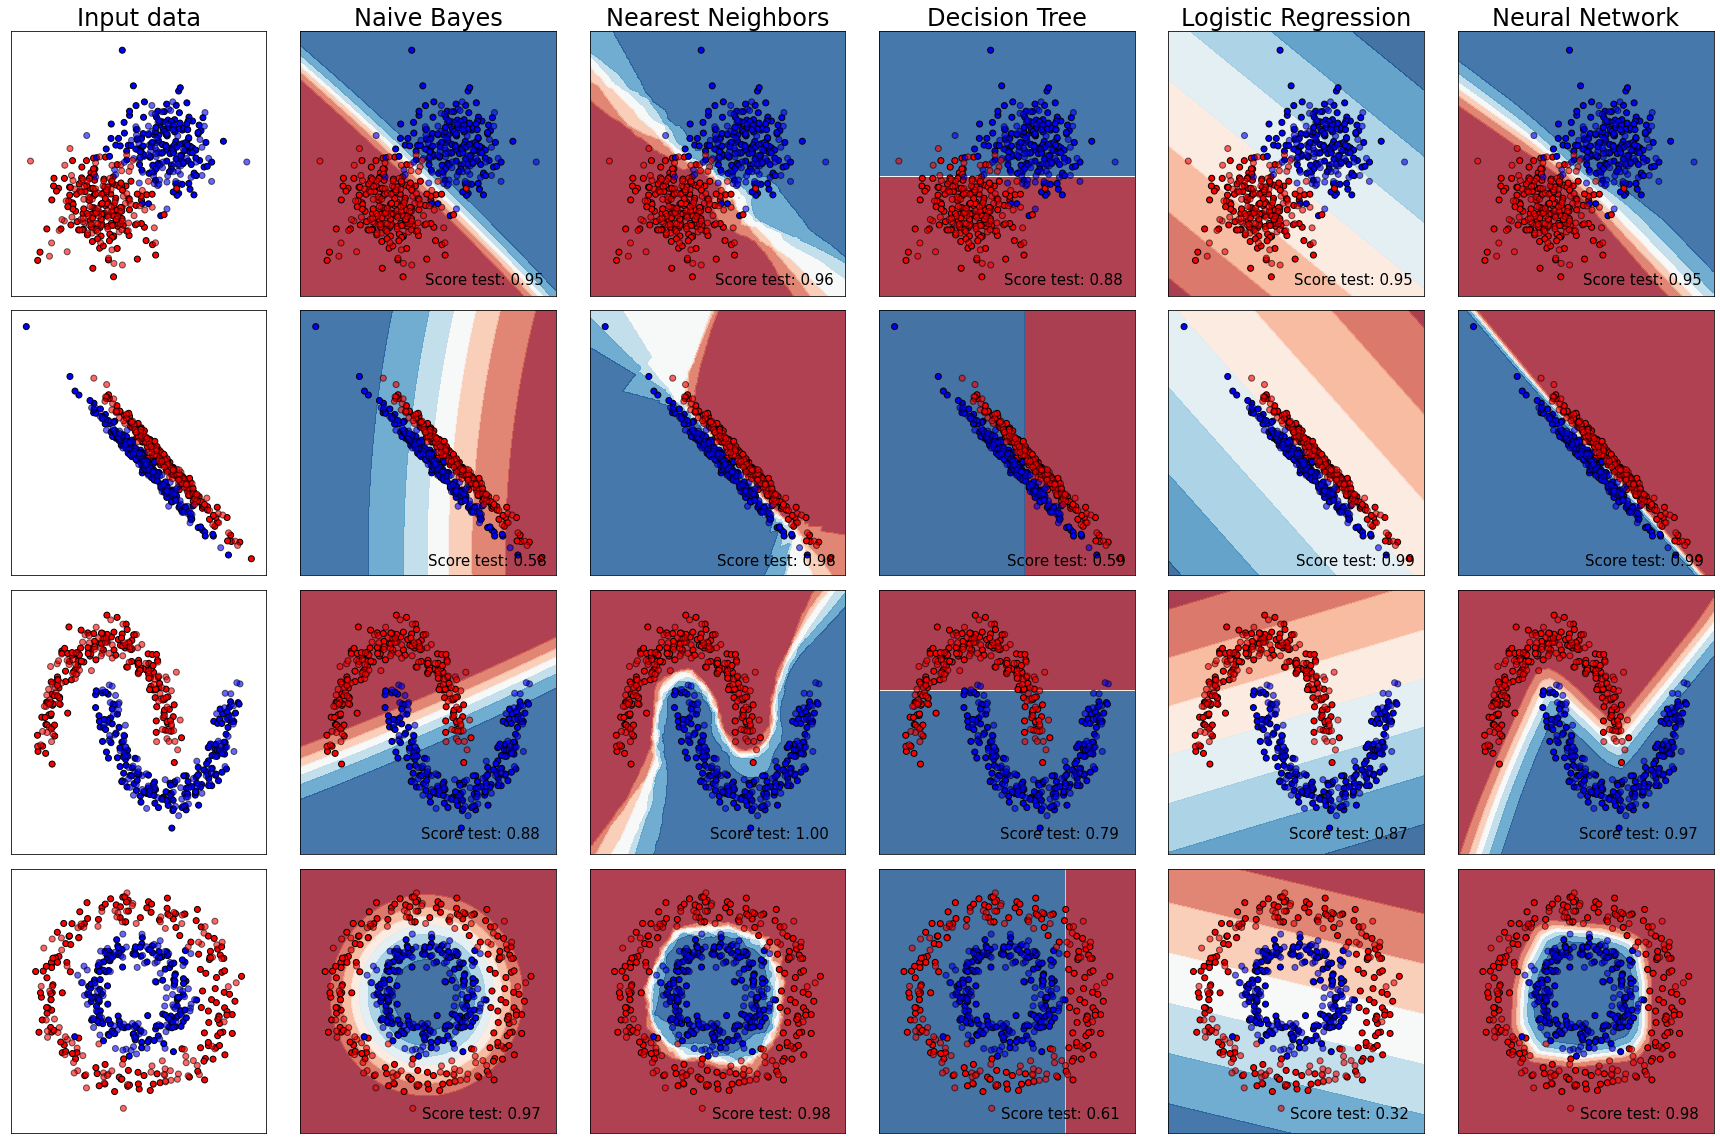

In [32]:
classifiers = [("Naive Bayes", GaussianNB()),
               ("Nearest Neighbors",
                KNeighborsClassifier(n_neighbors=10)), # número de vecinos
               ("Decision Tree",
                DecisionTreeClassifier(criterion='entropy',
                                       max_depth=1)), # profundidad máxima del árbol
               ("Logistic Regression",
                LogisticRegression(C=1e10,solver='lbfgs')), # C: cuanto más alto menos regularización 
               ("Neural Network",
                MLPClassifier(hidden_layer_sizes=(50,),
                              max_iter=700,
                              alpha=0))]

plot_classifiers(classifiers, datasets)

In [10]:
# Listado de los parámetros de los diferentes clasificadores
for name, clf in classifiers:
    print(clf)

GaussianNB()
KNeighborsClassifier(n_neighbors=10)
DecisionTreeClassifier(criterion='entropy', max_depth=3)
LogisticRegression(C=10000000000.0)
MLPClassifier(alpha=0, hidden_layer_sizes=(50,), max_iter=1000)


**Prueba a cambiar los siguientes parámetros (al menos 3-5 variantes en cada caso) y observa las consecuencias en la frontera de clasificación construida:**

* Número de vecinos en k-nn. ¿Por qué siempre debe ser impar cuando hay dos clases?

  **Porque si el valor de 'k' es par, puede haber empates y no se decidiría por ninguna de las dos clases.**
* Profundidad máxima de los árboles de decisión.

  **La profundidad máxima de los árboles de decisión es la necesaria para dividir todos los tipos de casos del entrenamiento, es decir, si con una pregunta (un nivel) consigue dividir todos tipos de casos, el árbol tendrá profundidad 1, a pesar de permitirle tener más profundidad.**
* Número de neuronas en la red neuronal y máximo número de épocas de entrenamiento. **Nota:** (50,) indica una única capa oculta con 50 neuronas. (50,10,) indica dos capas ocultas con 50 y 10 neuronas respectivamente. (50,10,20,) indica tres capas ocultas con 50, 10 y 20 neuronas respectivamente, etc.

  **Hemos realizado tres pruebas: Cambiar el número de capas con un número igual de neuronas (50), cambiar el número de neuronas en una sola capa y cambiar el número de iteraciones con una sola capa.**
  
  **Como conclusión podemos decir que cuanto más compleja sea la red neuronal (más neuronas, más capas y más iteraciones), mejor son las aproximaciones y el entrenamiento.**